In [1]:
# ----- LIBS

# normalizar
import numpy as np
from shapely.geometry import mapping
from sklearn.preprocessing import MinMaxScaler

# gerar e visualizar csv
import csv
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load datasets
conteiners_df = pd.read_csv('conteiners_dataset_elev.csv', index_col=0) 
batteries_df = pd.read_csv('coletores_pos_dataset_elev.csv', index_col=0) 
smart_meters_df = pd.read_csv('medidores_inteligentes_dataset_elev.csv', index_col=0) 

print("CONTEINERS - DATASET SHAPE:", conteiners_df.shape)
print("BATTERIES - DATASET SHAPE:", batteries_df.shape)
print("SMART METERS - DATASET SHAPE:", smart_meters_df.shape)

CONTEINERS - DATASET SHAPE: (175, 6)
BATTERIES - DATASET SHAPE: (47, 8)
SMART METERS - DATASET SHAPE: (321, 6)


In [3]:
## MUSEU COORDS:
# -22.814914, -47.057714

## Add Elevation of OpenTOPOdata on Battery dataset

In [4]:
batteries_df.head()

,id,name,x,y,z,elevation,latitude,longitude
0,1321.0,INOVA,1527.405075,2180.212233,1.5,644.458740,-22.814543,-47.059340
1,535.0,BC,297.311734,1965.812273,1.5,602.154968,-22.816324,-47.071348
2,802.0,CBMEG,1535.553550,1646.180816,1.5,652.513123,-22.819365,-47.059333
3,845.0,CCUEC,1149.489906,1831.086023,1.5,616.788940,-22.817648,-47.063068
4,1037.0,GASTROCENTRO,1186.795533,667.866479,1.5,635.025085,-22.828153,-47.062863


In [5]:
# ADD Elevação
import time
import requests

def get_point_elevation(lat, lng):
    receive = requests.get('https://api.opentopodata.org/v1/aster30m?locations=' + str(lat) + ','+ str(lng))
    data = receive.json()
#     print(data['results'][0]['elevation'])
    return float(data['results'][0]['elevation'])

In [6]:
elevation_column = []
for i in range(batteries_df.shape[0]):
    elevation = get_point_elevation(batteries_df['latitude'][i], batteries_df['longitude'][i])
    elevation_column.append(elevation)
    # print("i:", i,"-", "elevation:", elevation)
    time.sleep(1)

print(len(elevation_column))

47


In [7]:
# create new df 
df_elev = pd.DataFrame({'elev':elevation_column})
df_elev.head()

batteries_df['elevation'] = df_elev['elev']
batteries_df.head()

,id,name,x,y,z,elevation,latitude,longitude
0,1321.0,INOVA,1527.405075,2180.212233,1.5,638.0,-22.814543,-47.059340
1,535.0,BC,297.311734,1965.812273,1.5,604.0,-22.816324,-47.071348
2,802.0,CBMEG,1535.553550,1646.180816,1.5,641.0,-22.819365,-47.059333
3,845.0,CCUEC,1149.489906,1831.086023,1.5,609.0,-22.817648,-47.063068
4,1037.0,GASTROCENTRO,1186.795533,667.866479,1.5,632.0,-22.828153,-47.062863


## Make some histograms

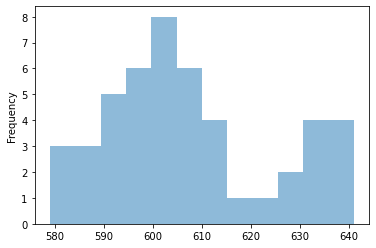

In [8]:
ax = batteries_df['elevation'].plot.hist(bins=12, alpha=0.5)

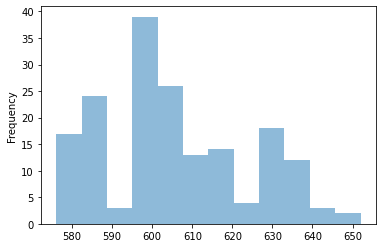

In [9]:
ax = conteiners_df['elevation'].plot.hist(bins=12, alpha=0.5)

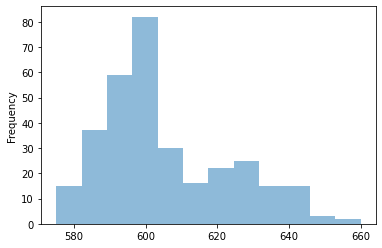

In [10]:
ax = smart_meters_df['elevation'].plot.hist(bins=12, alpha=0.5)

In [11]:
smart_meters_df.describe()

,x,y,z,lat,lng,elevation
count,321.000000,321.000000,321.0,321.000000,321.000000,321.000000
mean,887.629353,1585.221746,1.5,-22.819834,-47.065651,605.096573
std,329.659505,512.740906,0.0,0.004642,0.003190,17.541558
min,106.920896,307.442750,1.5,-22.831423,-47.073155,575.000000
25%,670.944572,1200.006018,1.5,-22.823317,-47.067690,593.000000
50%,874.873964,1681.576312,1.5,-22.818934,-47.065694,600.000000
75%,1088.425163,1984.898362,1.5,-22.816205,-47.063771,619.000000
max,1824.260611,2390.748853,1.5,-22.812542,-47.056441,660.000000


In [12]:
all_elevations = []

for i in range(batteries_df.shape[0]):
    all_elevations.append(smart_meters_df['elevation'][i])

for i in range(conteiners_df.shape[0]):
    all_elevations.append(smart_meters_df['elevation'][i])

for i in range(smart_meters_df.shape[0]):
    all_elevations.append(smart_meters_df['elevation'][i])

    
museu_elevation = get_point_elevation(-22.814914, -47.057714)
print("museu_elevation:", museu_elevation)
all_elevations.append(museu_elevation)

print("all elevations:", len(all_elevations))

museu_elevation: 652.0
all elevations: 544


In [13]:
# NORMALIZAÇÃO DE PONTOS 
def elevation_normalize(data_frame):
    norm_points = []

    # convert to 2D array 
    x = np.array(all_elevations).reshape(-1, 1) # reshape -> 2D array

    for i in range(data_frame['elevation'].shape[0]):
        # convert to 2D array
        x_coords = np.array(data_frame['elevation'][i]).reshape(-1, 1)

        # define limits of normalization
        scaler_x = MinMaxScaler(feature_range = (0, 10))

        # normalize with all all geometry coords x 
        scaler_x.fit(x)
        transform_x = scaler_x.transform(x_coords)

        #print(transform_x)
        norm_points.append(transform_x[0][0])
    
    return norm_points

In [14]:
# Datasets normalizados
print(len(elevation_normalize(batteries_df)), (elevation_normalize(batteries_df)))
# print(len(elevation_normalize(conteiners_df)), (elevation_normalize(conteiners_df)))
# print(len(elevation_normalize(smart_meters_df)), (elevation_normalize(smart_meters_df)))

47 [7.411764705882362, 3.411764705882362, 7.764705882352942, 4.0, 6.705882352941188, 1.1764705882353041, 7.058823529411768, 2.941176470588246, 2.470588235294116, 2.82352941176471, 3.058823529411768, 3.764705882352942, 3.64705882352942, 6.705882352941188, 4.352941176470594, 6.470588235294116, 0.470588235294116, 7.294117647058826, 6.82352941176471, 6.0, 3.411764705882362, 2.82352941176471, 2.235294117647058, 2.117647058823536, 2.352941176470594, 3.764705882352942, 3.294117647058826, 5.294117647058826, 1.764705882352942, 2.705882352941188, 2.941176470588246, 1.1764705882353041, 1.764705882352942, 0.9411764705882462, 4.117647058823536, 0.9411764705882462, 1.294117647058826, 3.058823529411768, 4.235294117647058, 2.235294117647058, 4.352941176470594, 2.705882352941188, 3.529411764705884, 3.529411764705884, 3.411764705882362, 7.411764705882362, 5.764705882352942]


In [16]:
# Normalizando elevação do museu
x_coords = np.array(museu_elevation).reshape(-1, 1)
scaler_x = MinMaxScaler(feature_range = (0, 10))
x = np.array(all_elevations).reshape(-1, 1) # reshape -> 2D array

scaler_x.fit(x)
transform_x = scaler_x.transform(x_coords)
transform_x

array([[9.05882353]])

## ADD colunas de elevaçao normalizada

In [17]:
# Batteries dataset
batteries_elev = elevation_normalize(batteries_df)
df_elev = pd.DataFrame({'elev_norm': batteries_elev})
batteries_df['elevation_norm'] = df_elev['elev_norm']
batteries_df.head()

,id,name,x,y,z,elevation,latitude,longitude,elevation_norm
0,1321.0,INOVA,1527.405075,2180.212233,1.5,638.0,-22.814543,-47.059340,7.411765
1,535.0,BC,297.311734,1965.812273,1.5,604.0,-22.816324,-47.071348,3.411765
2,802.0,CBMEG,1535.553550,1646.180816,1.5,641.0,-22.819365,-47.059333,7.764706
3,845.0,CCUEC,1149.489906,1831.086023,1.5,609.0,-22.817648,-47.063068,4.000000
4,1037.0,GASTROCENTRO,1186.795533,667.866479,1.5,632.0,-22.828153,-47.062863,6.705882


In [18]:
# Conteiners dataset
conteiners_elev = elevation_normalize(conteiners_df)
df_elev = pd.DataFrame({'elev_norm': conteiners_elev})
conteiners_df['elevation_norm'] = df_elev['elev_norm']
conteiners_df.head()

,x,y,z,lat,lng,elevation,elevation_norm
0,1494.522506,1093.362046,1.5,-22.824351,-47.059808,628.0,6.235294
1,1495.022506,1093.862046,1.5,-22.824351,-47.059808,628.0,6.235294
2,1495.522506,1094.362046,1.5,-22.824351,-47.059808,628.0,6.235294
3,1496.022506,1094.862046,1.5,-22.824351,-47.059808,628.0,6.235294
4,1444.593586,1176.185366,1.5,-22.823597,-47.060283,620.0,5.294118


In [19]:
# Smart Meters dataset
smart_meters_elev = elevation_normalize(smart_meters_df)
df_elev = pd.DataFrame({'elev_norm': smart_meters_elev})
smart_meters_df['elevation_norm'] = df_elev['elev_norm']
smart_meters_df.head()

,x,y,z,lat,lng,elevation,elevation_norm
0,1380.649965,2358.972321,1.5,-22.812911,-47.060745,619.0,5.176471
1,718.166862,1165.809614,1.5,-22.823599,-47.067359,605.0,3.529412
2,730.046698,1146.037408,1.5,-22.823779,-47.067246,605.0,3.529412
3,741.446086,1131.243106,1.5,-22.823914,-47.067137,605.0,3.529412
4,781.939848,1069.889758,1.5,-22.824473,-47.066751,606.0,3.647059


In [21]:
# saving the dataframes
batteries_df.to_csv('coletores_pos_dataset_elev_norm.csv',  index=False)
conteiners_df.to_csv('conteiners_dataset_elev_norm.csv',  index=False)
smart_meters_df.to_csv('medidores_inteligentes_dataset_elev_norm.csv',  index=False)

In [ ]:
# Museu elevation norm: array([[9.05882353]])